# FakeIEC VOTING app
Fake Iec is a fake mimic of the IEC elections. This is a & Statistical analysis & full stack web application used to demonstrate effieciency in working with data.

The application includes:
- Excel files
- Python IPYNB files
- Python scripts
- Python Django Rest framework API
- ReactJs frontend website front

The python scripts to generate data, add data to the excel spreadsheet, extract data from the spreadsheet and store the data to the database are all found in the backend directory of this repository.


In [21]:
!pip install faker
!pip install pandas
!pip install openpyxl
!pip install matplotlib
!pip install numpy
!pip install Jinja2
!pip install Pillow

# imports
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt

# database connection
db_path = './fakeIecBackend/db.sqlite3'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Ethnicity distribution

  Ethnicity  Vote Count
0     black         230
1  coloured         275
2    indian         243
3     white         252


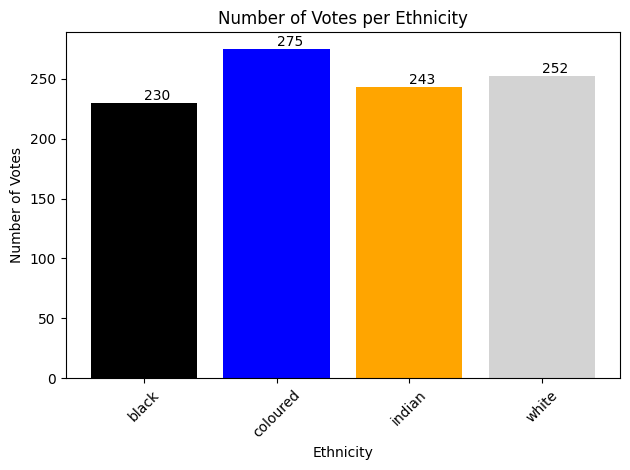

In [22]:
query_fetch_votes = """
    SELECT ethnicity.name, COUNT(*) as vote_count
    FROM voteapp_voter
    INNER JOIN voteapp_ethnicity AS ethnicity
    ON voteapp_voter.ethnicity_id = ethnicity.id
    GROUP BY ethnicity.name;
"""
cursor.execute(query_fetch_votes)
votes_per_ethnicity = cursor.fetchall()

# Create a DataFrame
df_votes_per_ethnicity = pd.DataFrame(votes_per_ethnicity, columns=['Ethnicity', 'Vote Count'])
print(df_votes_per_ethnicity)

# Separate ethnicity names and vote counts
ethnicities = [item[0] for item in votes_per_ethnicity]
vote_counts = [item[1] for item in votes_per_ethnicity]

# Define different colors for each category
colors = ['black', 'blue', 'orange', 'lightgrey']

# Plot histogram
fig, ax = plt.subplots()
bars = ax.bar(ethnicities, vote_counts, color=colors)
ax.set_xlabel('Ethnicity')
ax.set_ylabel('Number of Votes')
ax.set_title('Number of Votes per Ethnicity')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add labels to each bar for clarity
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, yval, int(yval), va='bottom')  # va: vertical alignment

# Show the plot
plt.tight_layout()
plt.show()


In [23]:
# Ethnicity distibution in table format:
# Create a DataFrame
df_votes_per_ethnicity = pd.DataFrame(votes_per_ethnicity, columns=['Ethnicity', 'Vote Count'])

# Apply styling
styled_df = df_votes_per_ethnicity.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [('background-color', '#f7f7f9'), ('color', 'black'), ('font-size', '18px'), ('padding', '10px')]
    }, {
        'selector': 'td',
        'props': [('border', '1px solid #dddddd'), ('font-size', '16px'), ('padding', '10px')]
    }]
).set_properties(**{
    'background-color': '#ffffff',
    'color': 'black',
    'border-color': 'black',
    'font-size': '16px',
    'padding': '10px'
}).highlight_max(subset=['Vote Count'], color='lightgreen').highlight_min(subset=['Vote Count'], color='lightcoral')

styled_df

,Ethnicity,Vote Count
0,black,230
1,coloured,275
2,indian,243
3,white,252


In [24]:
# fetch total number of registered voters:
query_total_number_of_registered_voters = """
    SELECT COUNT(*) FROM voteapp_voter;
"""

cursor.execute(query_total_number_of_registered_voters)
result1 = cursor.fetchone()
if(result1):
    print(f"Total number of registered voters: {result1[0]}")

## Fetch number of voters who registered and voted:
query_total_of_voted = """ 
    SELECT COUNT(*) FROM voteapp_voter v 
    JOIN voteapp_vote vt on v.vote_id = vt.id
    WHERE vt.national IS NOT NULL
    AND vt.provincial IS NOT NULL
    AND vt.regional IS NOT NULL
"""

cursor.execute(query_total_of_voted)
result2 = cursor.fetchone()

if(result2):
    print(f"Total number of registered voters who voted {result2[0]}")

conn.commit()

Total number of registered voters: 1000
Total number of registered voters who voted 685


Voter participation in elections

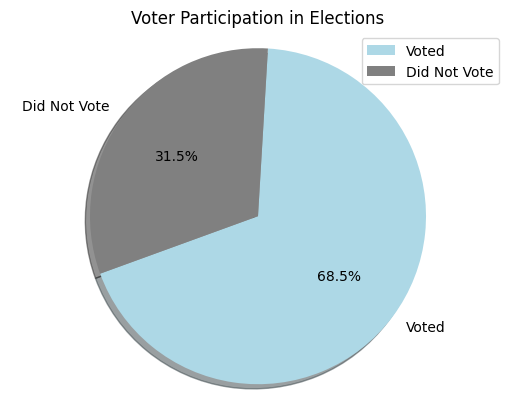

In [25]:
# plotting the above data:

# calculation
total_registered = result1[0]
total_voted = result2[0]
non_voted = total_registered - total_voted

percentage_voted = (total_voted/total_registered) * 100
percentage_non_voted = 100 - percentage_voted

# print(percentage_non_voted)

labels = ['Voted', 'Did Not Vote']
sizes = [percentage_voted, percentage_non_voted]
colors = ['lightblue', 'grey']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=200)
plt.legend(labels, loc="upper right")
plt.title("Voter Participation in Elections")
plt.axis('equal')
plt.show()

Number of voters per geneder

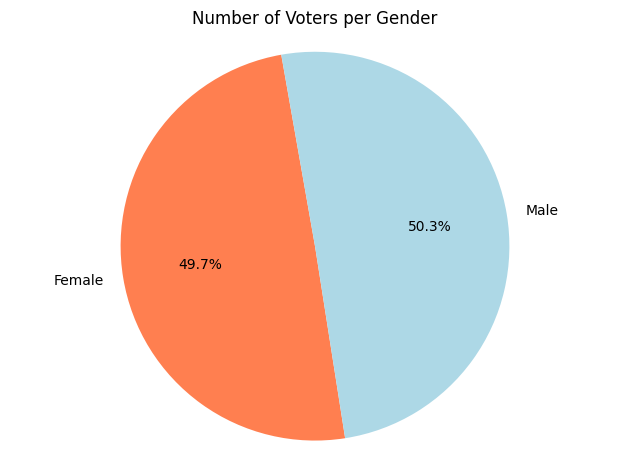

In [26]:

# Query to get the number of voters per gender
query = """
    SELECT gender, COUNT(*) as count
    FROM voteapp_voter
    GROUP BY gender;
"""
cursor.execute(query)
voters_per_gender = cursor.fetchall()

# Close the connection
# cursor.close()


# Separate gender names and counts
genders = [item[0] for item in voters_per_gender]
counts = [item[1] for item in voters_per_gender]

# Define colors for each gender
colors = ['coral', 'lightblue']

# Plot pie chart
fig, ax = plt.subplots()
ax.pie(counts, labels=genders, colors=colors, autopct='%1.1f%%', startangle=100)
ax.set_title('Number of Voters per Gender')

# Equal aspect ratio ensures the pie is drawn as a circle
ax.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

Display total votes per political party

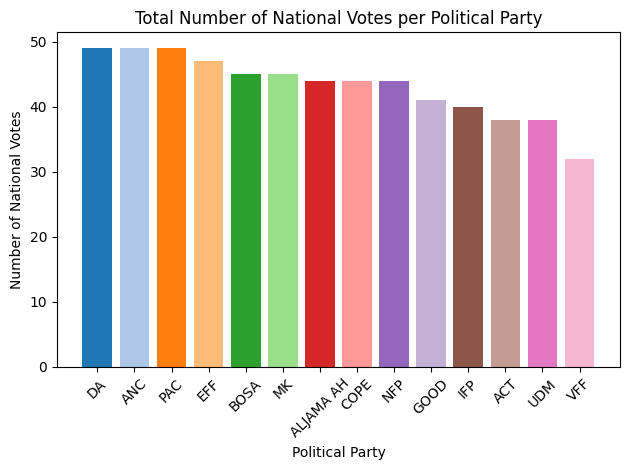

In [27]:
# Query to get the total number of national votes per political party
query = """
    SELECT national, COUNT(*) as count
    FROM voteapp_vote
    GROUP BY national;
"""
cursor.execute(query)
national_votes_per_party = cursor.fetchall()


# Convert the query result to a DataFrame for better visualization
df_national_votes = pd.DataFrame(national_votes_per_party, columns=['Party', 'Vote Count'])

# Display the filtered DataFrame
# print(df_national_votes)
df_national_vote_without_None = df_national_votes[1:]
df_national_vote_without_None = df_national_vote_without_None.sort_values(by='Vote Count', ascending=False)

# Plot the data
fig, ax = plt.subplots()
colors = plt.cm.tab20.colors  # Use a colormap for distinct colors
ax.bar(df_national_vote_without_None['Party'], df_national_vote_without_None['Vote Count'], color=colors)
ax.set_xlabel('Political Party')
ax.set_ylabel('Number of National Votes')
ax.set_title('Total Number of National Votes per Political Party')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Total number of provincial votes per political party in Limpopo

        Party  Vote Count
12        PAC           8
5        COPE           7
9         IFP           7
10         MK           6
7         EFF           6
13        UDM           6
1         ACT           5
11        NFP           5
4        BOSA           5
2   ALJAMA AH           5
14        VFF           5
3         ANC           4
8        GOOD           4
6          DA           3


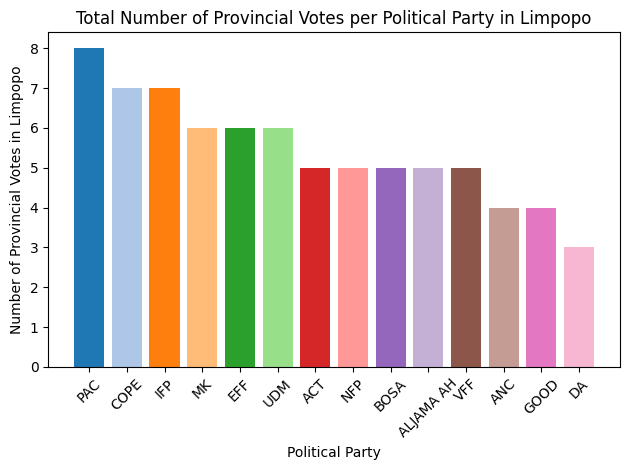

In [28]:
# Query to get the total number of votes per political party in Limpopo
query = """
    SELECT v.provincial, COUNT(*) as count
    FROM voteapp_voter as vv
    JOIN voteapp_address as a ON vv.address_id = a.id
    JOIN voteapp_vote as v ON vv.vote_id = v.id
    WHERE a.province = 'Limpopo'
    GROUP BY v.provincial;
"""
cursor.execute(query)
limpopo_votes_per_party = cursor.fetchall()

# Close the connection

# Convert the query result to a DataFrame for better visualization
df_limpopo_votes = pd.DataFrame(limpopo_votes_per_party, columns=['Party', 'Vote Count']).sort_values(by='Vote Count', ascending=False)
df_limpopo_votes = df_limpopo_votes[1:]
df_limpopo_votes

print(df_limpopo_votes) # print the data frame

# Plot the data
fig, ax = plt.subplots()
colors = plt.cm.tab20.colors  # Use a colormap for distinct colors
ax.bar(df_limpopo_votes['Party'], df_limpopo_votes['Vote Count'], color=colors)
ax.set_xlabel('Political Party')
ax.set_ylabel('Number of Provincial Votes in Limpopo')
ax.set_title('Total Number of Provincial Votes per Political Party in Limpopo')

plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Getting the age of Voters

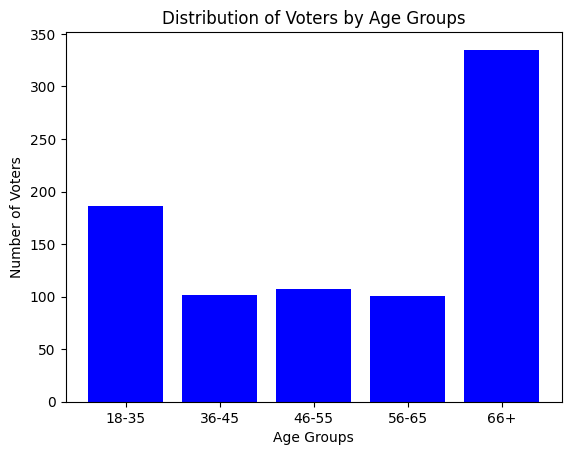

In [29]:
# Get age of users:

# Get birth year from ID number
def get_birth_year_from_id(idnumber):
    year_prefix = int(idnumber[:2])
    current_year = datetime.now().year % 100  # Get the last two digits of the current year
    century = 1900 if year_prefix > current_year else 2000
    return century + year_prefix

# Calculate age from birth year
def calculate_age(birth_year):
    current_year = datetime.now().year
    return current_year - birth_year

# Fetch all voters
query_fetch_voters = """
    SELECT firstname, lastname, idnumber FROM voteapp_voter;
"""
cursor.execute(query_fetch_voters)
voters = cursor.fetchall()

# Age groups initialization
age_groups = {
    '18-35': 0,
    '36-45': 0,
    '46-55': 0,
    '56-65': 0,
    '66+': 0
}

# Calculate ages and categorize into age groups
for voter in voters:
    firstname, lastname, idnumber = voter
    birth_year = get_birth_year_from_id(idnumber)
    age = calculate_age(birth_year)
    
    # Ignore users below 18 years old
    if age >= 18:
        if 18 <= age <= 35:
            age_groups['18-35'] += 1
        elif 36 <= age <= 45:
            age_groups['36-45'] += 1
        elif 46 <= age <= 55:
            age_groups['46-55'] += 1
        elif 56 <= age <= 65:
            age_groups['56-65'] += 1
        else:
            age_groups['66+'] += 1

# Plot histogram
fig, ax = plt.subplots()
age_group_labels = list(age_groups.keys())
age_group_counts = list(age_groups.values())

ax.bar(age_group_labels, age_group_counts, color='blue')
ax.set_xlabel('Age Groups')
ax.set_ylabel('Number of Voters')
ax.set_title('Distribution of Voters by Age Groups')

# Show the plot
plt.show()

Close the database connection

In [30]:
conn.close()